# import

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import re

In [4]:
import matplotlib.pyplot as plt

In [5]:
from IPython.core import debugger as idb

# config

In [6]:
bbox_csv_fn = './data/src_img/allboxes.csv'

# bbox neighbor distance statistics

## functions

In [7]:
pat_num = re.compile(r'\d+')

def str2bboxs(string):
    '''
    example:
    get a string like '[[1,1,2,2],[3,3,4,4]]', return a list like [[1,1,2,2],[3,3,4,4]]
    '''
    res = pat_num.findall(string)
    res = list(map(np.long, res))
    res = np.array(res).reshape(-1,4)
    res = res.tolist()
    return res

In [8]:
def bboxs2centers(bboxs):
    '''
    example:
    get a bboxs like [[1,2,3,4],[5,6,7,8]], return centers like [[2,3],[6,7]]
    '''
    centers = np.zeros((bboxs.shape[0],2))
    centers[:,0] = bboxs[:,0::2].mean(1)
    centers[:,1] = bboxs[:,1::2].mean(1)
    
    return centers

In [9]:
aaa = np.array([-1,2,3,2])
aaa

array([-1,  2,  3,  2])

In [10]:
abs(aaa)

array([1, 2, 3, 2])

In [11]:
np.argmax(aaa)

2

In [12]:
def neighbor_xyDiff(points):
    '''
    Get the difference on x and y direction between each point and it's neighbor. 
    '''
    xyDiffs = np.zeros_like(points)
    for i in range(points.shape[0]):
        p = points[i]
        op = np.delete(points,i,0) # op: Other Points
        sDists = np.power(op-p[None],2).sum(1) # sDists: Square DISTanceS, we just compare them, do not need the actural distances, there square are enough.
        nId = np.argmin(sDists)# InDex of Neighbor 
        xyDiffs[i,:] = abs(op[nId,:]-p)
        
    return xyDiffs

## process

### 加载数据

In [13]:
# 读入csv
df = pd.read_csv(bbox_csv_fn,index_col=0)
df

,image,box,cls
0,[BA18101C-D01-03]短路电流计算及校验表.pdf__dpi300.0_0.png,"[[1209, 876, 1301, 931], [1209, 1125, 1299, 11...","['c13_danxiangbyq', 'c13_danxiangbyq', 'c13_da..."
1,[BA18101C-D01-04]电气主接线图.pdf__dpi300.0_0.png,"[[2097, 1579, 2235, 1662], [2100, 3754, 2232, ...","['c1_tiaoya', 'c1_tiaoya', 'c1_tiaoya', 'c2_di..."
2,[BA18101C-D01-08]110kV主变进线及母线设备间隔断面图.pdf__dpi3...,"[[569, 1975, 701, 2070], [614, 2187, 645, 2223...","['c2_dianyahgq', 'c3_3gongweiglkg', 'c3_3gongw..."
3,[BA18101C-D01-09]110kV出线间隔断面图.pdf__dpi300.0_0.png,"[[569, 2146, 604, 2184], [589, 1782, 625, 1821...","['c3_3gongweiglkg', 'c3_3gongweiglkg', 'c3_3go..."
4,[BA18101C-D01-10]110kV内桥间隔断面图.pdf__dpi300.0_0.png,"[[461, 2448, 488, 2482], [634, 2448, 663, 2483...","['c3_3gongweiglkg', 'c3_3gongweiglkg', 'c8_dia..."
5,[BA18101C-D01-11]10kV配电装置接线图.pdf__dpi300.0_0.png,"[[2622, 2699, 2724, 2774], [2622, 4261, 2723, ...","['c2_dianyahgq', 'c2_dianyahgq', 'c5_daidianxi..."
6,[BA18101C-D01-15]10kV电容器组平断面图.pdf__dpi300.0_0.png,"[[298, 2690, 328, 2707], [352, 2506, 420, 2547...","['c7_bileiqi', 'c15_duojikaiguan', 'c16_dianka..."
7,[BA18101C-D01-16]站用电系统接线图.pdf__dpi300.0_0.png,"[[721, 1407, 749, 1423], [1240, 1047, 1290, 11...","['c7_bileiqi', 'c8_dianliuhgq', 'c8_dianliuhgq..."
8,[BA18101C-D02-06]全站保护配置图.pdf__dpi300.0_0.png,[],[]
9,[BA18101C-D02-07]变电站过程层设备配置图.pdf__dpi300.0_0.png,"[[2087, 3750, 2232, 3845], [2088, 1573, 2235, ...","['c1_tiaoya', 'c1_tiaoya', 'c1_tiaoya', 'c2_di..."


In [14]:
# 获取所有bbox数据，来源图片相同的组织为一个array，所有array放在一个list里
bboxss = []
for box_str in df.box:
    bboxs = str2bboxs(box_str)
    bboxs = np.array(bboxs)
    bboxss += [bboxs]

In [15]:
# 剔除空bboxs
bboxss = [bboxs for bboxs in bboxss if len(bboxs)!=0]

### 得到 neighbor x,y delta

In [16]:
# 提取bbox中心
centerss = []
for bboxs in bboxss:
    centers = bboxs2centers(bboxs)
    centerss += [centers]

In [17]:
# 提取各点与最近邻点在x、y方向上的差
xydss = [] # X and Y DifferenceSS
for centers in centerss:
    xyds = neighbor_xyDiff(centers)
    xydss += [xyds]

In [18]:
# 打破“来源图片相同的bboxs组织在一个array中”的边界，将所有xyDs组织在一起
tds = xydss[0] # tds: Total xy DifferenceS
for xyds in xydss[1:]:
    tds = np.append(tds,xyds,axis=0)

### 查看 neighbor x,y delta 的分布

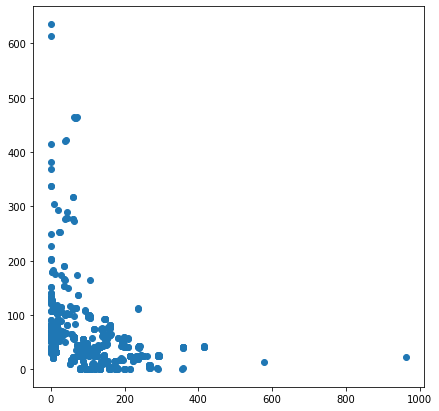

In [19]:
# 绘制所有neighbor x,y delta
plt.figure(figsize=(7,7))
plt.scatter(tds[:,0],tds[:,1],linewidths=1);

(0, 100)

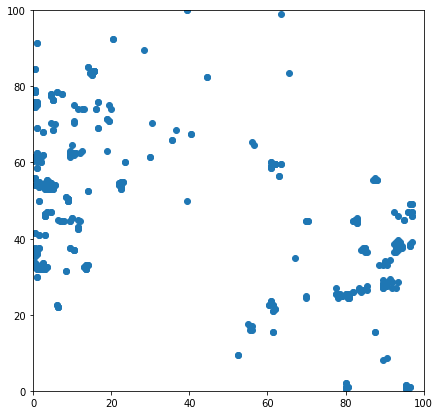

In [20]:
# 放大观察小距离的neighbor x,y delta
plt.figure(figsize=(7,7))
plt.scatter(tds[:,0],tds[:,1],linewidths=1)
plt.xlim(0,100)
plt.ylim(0,100)

In [21]:
# 我们更关心两相邻点之间相距更远的那个方向上的距离
x_d = []
y_d = []
for d in tds:
    x,y = d
    if x>=y: 
        x_d += [x]
    else:
        y_d += [y]

print(f'x:{min(x_d)}, y:{min(y_d)}')

x:52.5, y:22.0
